Dataset Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None

Performing Exploratory Data Analysis...

Descriptive Statistics:
          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630

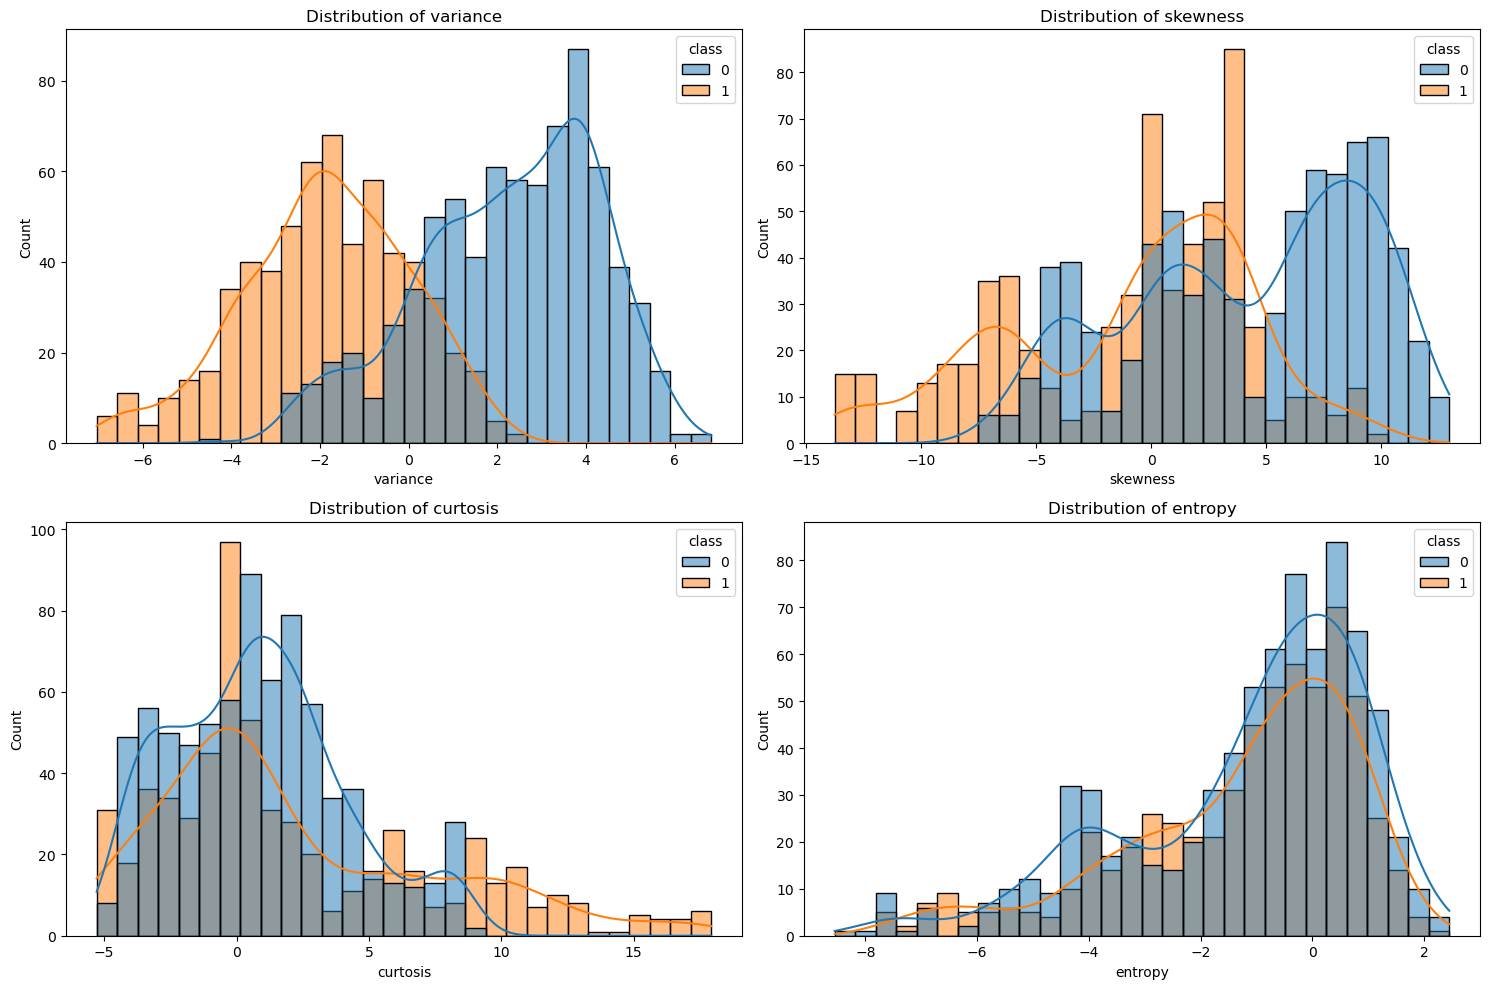

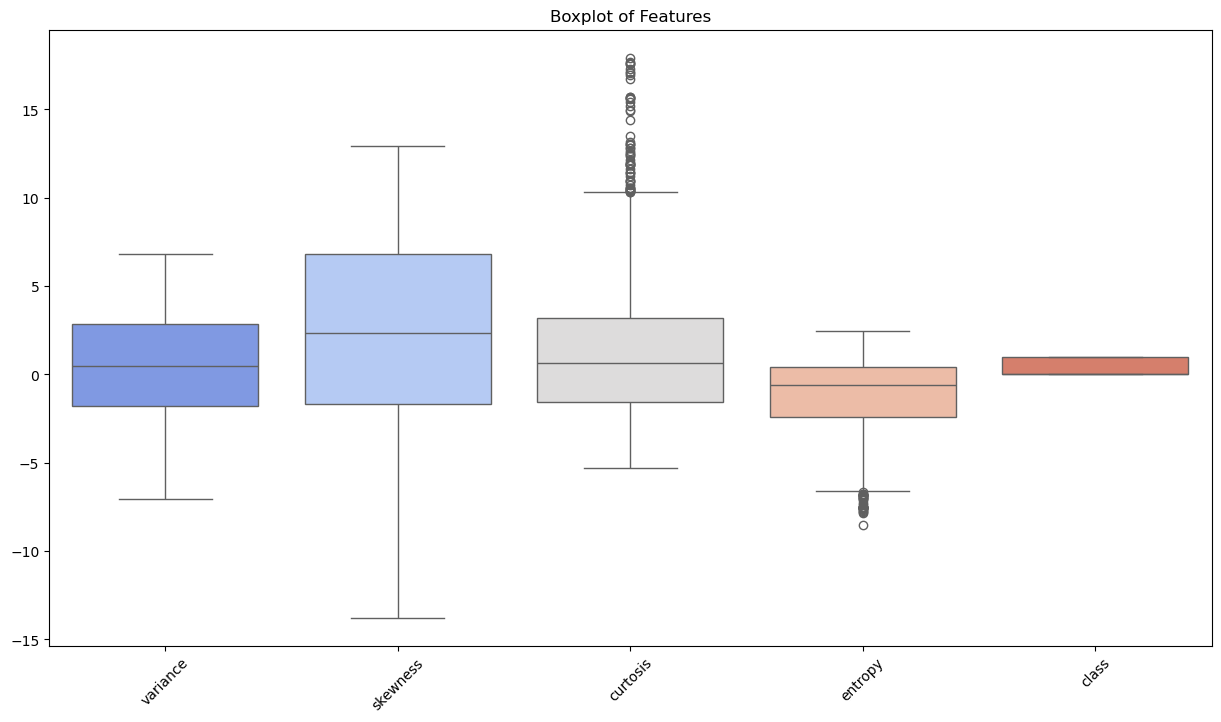

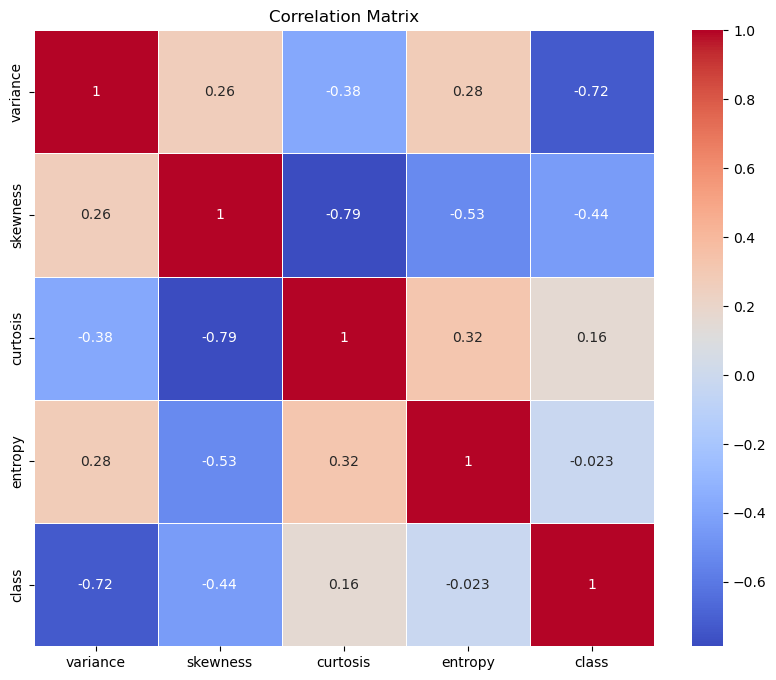


Training Model...

Evaluating Model Performance...
Training Accuracy: 1.0
Testing Accuracy: 0.9963636363636363

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       153
           1       0.99      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



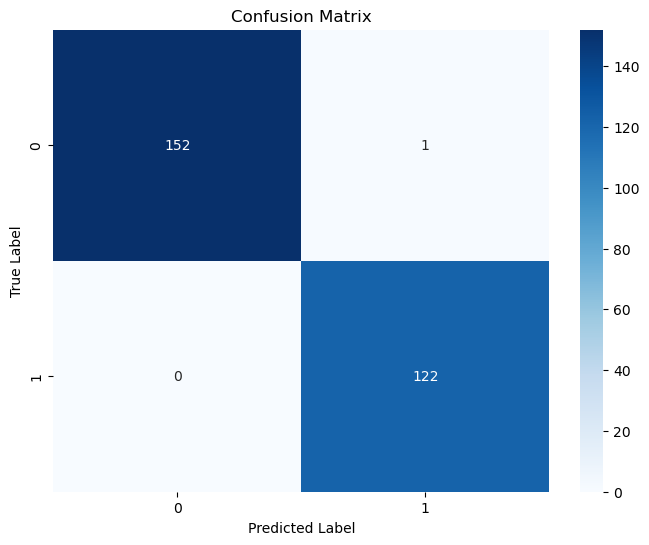

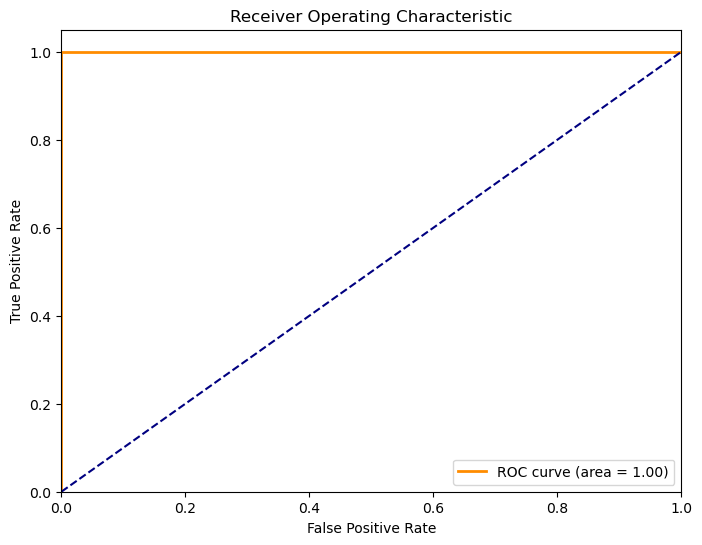

C:\TEMP\ipykernel_22948\4019874234.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices], palette='viridis')


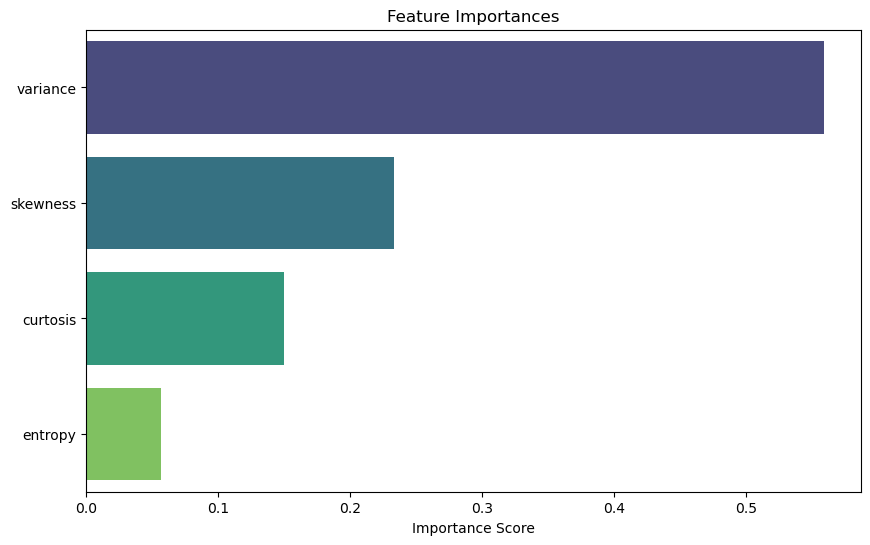


Feature Importance Values:
variance: 0.5592
skewness: 0.2336
curtosis: 0.1505
entropy: 0.0567

Cross-validation scores: [0.99090909 1.         0.99086758 0.99086758 0.99086758]
Average CV score: 0.993 (+/- 0.007)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

def load_and_preprocess_data(file_path='BankNoteAuthentication.csv'):
    try:
        df = pd.read_csv(file_path)
        print("Dataset Loaded Successfully!")
        print(df.info())
        
        X = df.iloc[:, :-1]
        y = df.iloc[:, -1]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        return df, X_train_scaled, X_test_scaled, y_train, y_test, scaler, df.columns[:-1]
    except FileNotFoundError:
        print("Error: File tidak ditemukan!")
        return None, None, None, None, None, None, None

def perform_eda(df):
    print("\nPerforming Exploratory Data Analysis...")
    
    print("\nDescriptive Statistics:")
    print(df.describe())
    
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(df.columns[:-1], 1):
        plt.subplot(2, 2, i)
        sns.histplot(df, x=column, hue='class', bins=30, kde=True)
        plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df, palette="coolwarm")
    plt.title("Boxplot of Features")
    plt.xticks(rotation=45)
    plt.show()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

def train_model(X_train, y_train):
    model = RandomForestClassifier(
        n_estimators=150,
        max_depth=15,
        min_samples_split=4,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test, X_train, y_train):
    print("\nEvaluating Model Performance...")
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print("Training Accuracy:", (y_pred_train == y_train).mean())
    print("Testing Accuracy:", (y_pred_test == y_test).mean())
    
    print("\nClassification Report (Test Data):")
    print(classification_report(y_test, y_pred_test))
    
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    
def analyze_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices], palette='viridis')
    plt.title("Feature Importances")
    plt.xlabel("Importance Score")
    plt.show()
    
    print("\nFeature Importance Values:")
    for idx in indices:
        print(f"{feature_names[idx]}: {importances[idx]:.4f}")

def main():
    df, X_train, X_test, y_train, y_test, scaler, feature_names = load_and_preprocess_data()
    if df is None:
        return
    
    perform_eda(df)
    
    print("\nTraining Model...")
    model = train_model(X_train, y_train)
    
    evaluate_model(model, X_test, y_test, X_train, y_train)
    
    analyze_feature_importance(model, feature_names)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"\nCross-validation scores: {cv_scores}")
    print(f"Average CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

if __name__ == "__main__":
    main()
